In [6]:
import pandas as pd

# Load dataset
file_path = r'C:\Users\91944\Desktop\progody internship Machine leraning\Task 2\Mall_Customers.csv'
df = pd.read_csv(file_path)


In [8]:
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [12]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [22]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [24]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [26]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [28]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


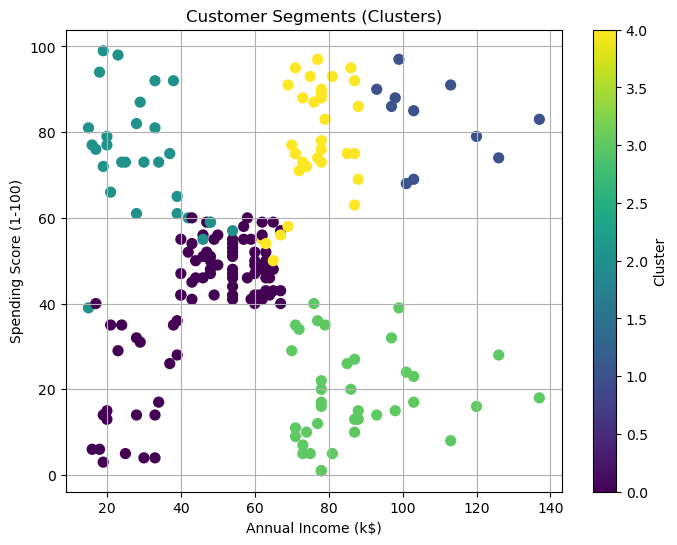

In [30]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # To avoid MKL warning on Windows

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use these features for clustering (Age, Annual Income, Spending Score)
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Choose number of clusters - say 5 (can change after elbow method)
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to dataframe
df['Cluster'] = clusters

# Plot clusters on Annual Income vs Spending Score
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segments (Clusters)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


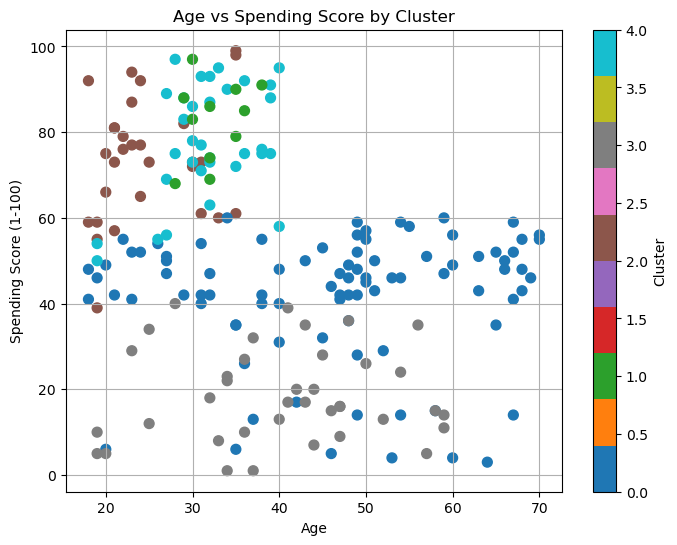

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='tab10', s=50)
plt.title('Age vs Spending Score by Cluster')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


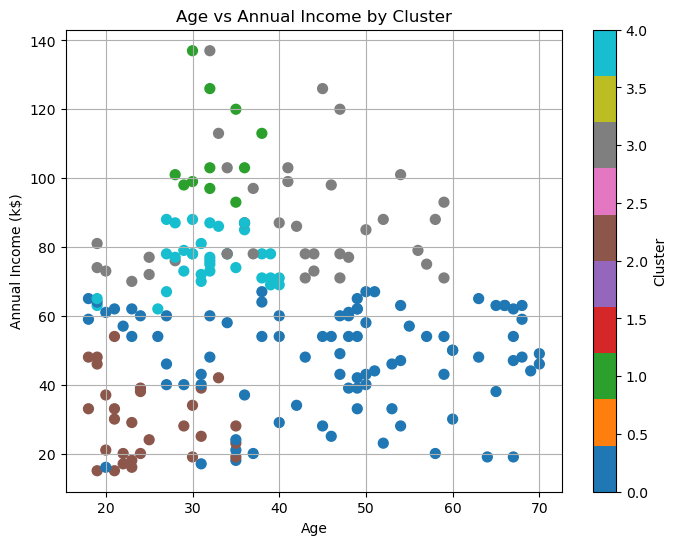

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'], cmap='tab10', s=50)
plt.title('Age vs Annual Income by Cluster')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


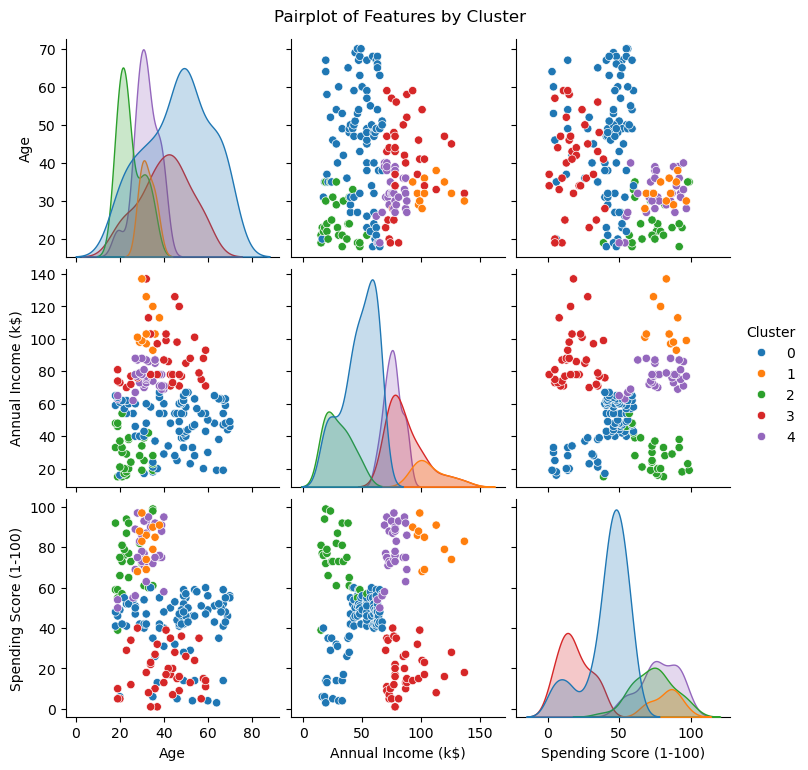

In [36]:
import seaborn as sns

sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']], hue='Cluster', palette='tab10')
plt.suptitle('Pairplot of Features by Cluster', y=1.02)
plt.show()


C:\Users\91944\AppData\Local\Temp\ipykernel_18444\2259679038.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab10')


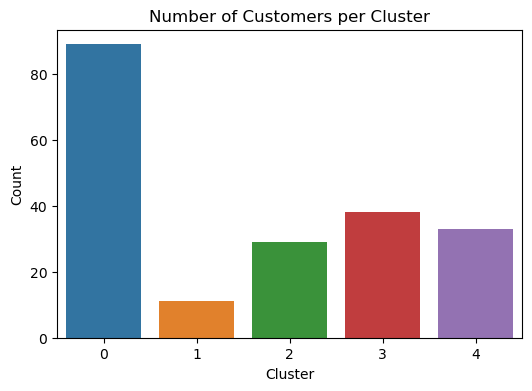

In [37]:
cluster_counts = df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab10')
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()
